In [2]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl

s = json.load(open('fbb_matplotlibrc.json'))
print s

#pl.rcParams.update(s)
%pylab inline

{u'lines.linewidth': 2.0, u'axes.edgecolor': u'#bcbcbc', u'patch.linewidth': 1.0, u'legend.fancybox': True, u'axes.color_cycle': [u'SteelBlue', u'IndianRed', u'Green', u'DarkOrange', u'MediumTurquoise', u'gold', u'#E24A33'], u'axes.facecolor': u'#ffffff', u'axes.labelsize': u'large', u'axes.grid': True, u'patch.edgecolor': u'#ffffff', u'axes.titlesize': u'x-large', u'examples.directory': u'', u'svg.embed_char_paths': u'path'}
Populating the interactive namespace from numpy and matplotlib


In [3]:
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status', u'BBLs Co-reported', u'Reported NYC Building Identificaiton Numbers (BINs)', u'Street Number', u'Street Name', u'Borough', u'Zip Code', u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)', u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)', u'Weather Normalized Source EUI(kBtu/ft2)', u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)', u'Automatic Water Benchmarking Eligible', u'Reported Water Method', u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)', u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)', u'Reported Property Floor Area (Building(s)) (ft²)', u'DOF Property Floor Area (Buildngs and Parking)(ft2)', u'Primary Property Type - Self Selected', u'DOF Number of Buildings'], dtype='object')


In [4]:
bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([u'APPBBL', u'APPDate', u'Address', u'AllZoning1', u'AllZoning2', u'AreaSource', u'AssessLand', u'AssessTot', u'BBL', u'BldgArea', u'BldgClass', u'BldgDepth', u'BldgFront', u'Block', u'BoroCode', u'Borough', u'BsmtCode', u'BuiltCode', u'BuiltFAR', u'CB2010', u'CD', u'CT2010', u'ComArea', u'CommFAR', u'CondoNo', u'Council', u'EDesigNum', u'Easements', u'ExemptLand', u'ExemptTot', u'Ext', u'FacilFAR', u'FactryArea', u'FireComp', u'GarageArea', u'HealthArea', u'HistDist', u'IrrLotCode', u'LandUse', u'Landmark', u'Lot', u'LotArea', u'LotDepth', u'LotFront', u'LotType', u'LtdHeight', u'MAPPLUTO_F', u'NumBldgs', u'NumFloors', u'OfficeArea', u'OtherArea', u'Overlay1', u'Overlay2', u'OwnerName', u'OwnerType', u'PLUTOMapID', u'PolicePrct', u'ProxCode', u'ResArea', u'ResidFAR', u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng', u'SPDist1', u'SPDist2', u'Sanborn', u'SchoolDist', u'SplitZone', u'StrgeArea', u'TaxMap', u'Tract2010', u'UnitsRes', u'UnitsTotal', u'Version', u'XCoord', u'YCoord', u'Ye

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003DC39EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000358B2208>]], dtype=object)

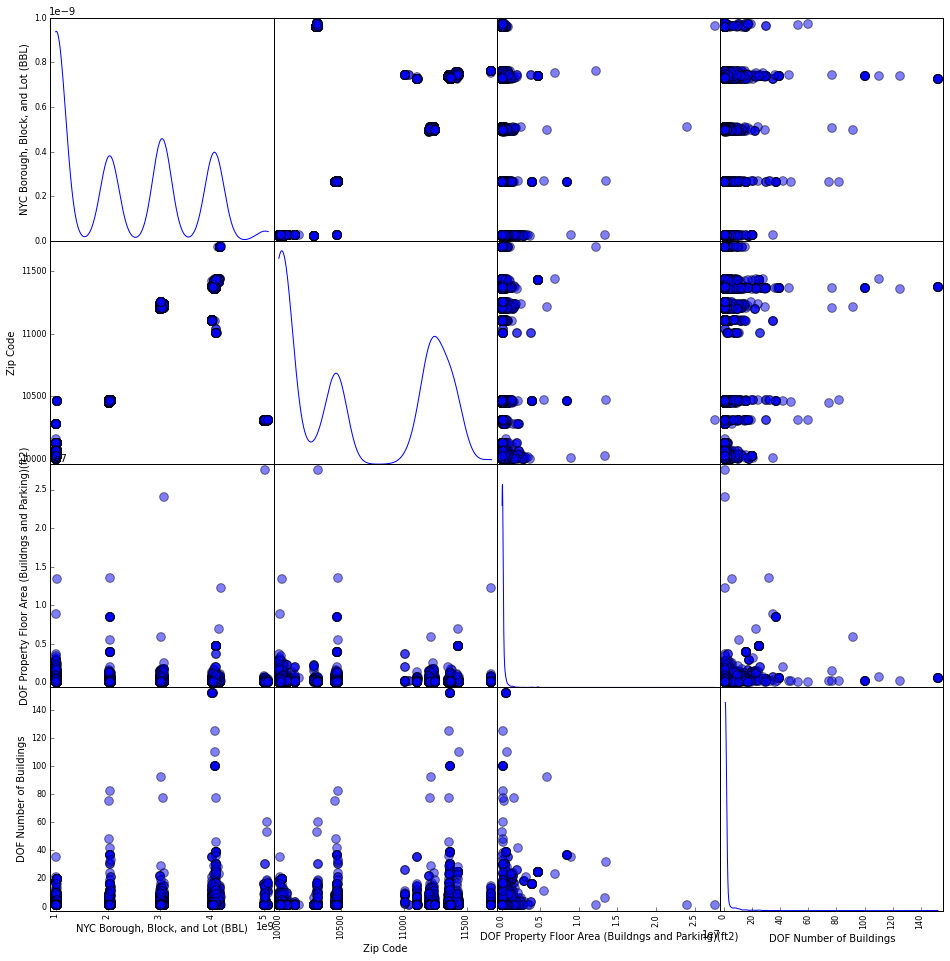

In [5]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [6]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
    

In [7]:
#create the indeces array here
vfunc = np.vectorize(canconvert)
#indx = nrg['Site EUI(kBtu/ft2)']  
nrg['indx'] = vfunc(nrg['Site EUI(kBtu/ft2)'])
nrg['Site EUI(kBtu/ft2)'][~nrg['indx']] = float('NaN')

print nrg['indx']

print nrg['indx'].values[3]
    

Record Number
16099            True
500              True
5017             True
5116             True
363              True
6876             True
10714            True
1214             True
1544             True
1905             True
2301             True
15059            True
674              True
2537             True
2841             True
...
13944            True
13945            True
13821            True
13829            True
13837            True
13838            True
13847            True
14352            True
12976            True
12978            True
12984            True
12987            True
12988            True
13472            True
13482            True
Name: indx, Length: 16170, dtype: bool
True


C:\Users\wentao\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
nrg['energy per sq'] = nrg['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nrg['area'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)
print bsize.BBL.astype(float)

0     1002760020
1     1002280022
2     1005900056
3     1005890030
4     1005310056
5     1011860040
6     1004940026
7     1005580017
8     1001807505
9     1005820050
10    1004680049
11    1008090073
12    1002040034
13    1002270019
14    1001367504
...
42771    1017800075
42772    1003010011
42773    1016527501
42774    1004930030
42775    1010370038
42776    1006240008
42777    1010170004
42778    1010370030
42779    1007020125
42780    1013730001
42781    1013730030
42782    1018447501
42783    1020957501
42784    1020677501
42785    1014737504
Name: BBL, Length: 42786, dtype: float64


Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status', u'BBLs Co-reported', u'Reported NYC Building Identificaiton Numbers (BINs)', u'Street Number', u'Street Name', u'Borough_x', u'Zip Code', u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)', u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)', u'Weather Normalized Source EUI(kBtu/ft2)', u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)', u'Automatic Water Benchmarking Eligible', u'Reported Water Method', u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)', u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)', u'Reported Property Floor Area (Building(s)) (ft²)', u'DOF Property Floor Area (Buildngs and Parking)(ft2)', u'Primary Property Type - Self Selected', u'DOF Number of Buildings', u'indx', u'energy per sq', u'area', u'BBL', u'APPBBL', u'APPDate', u'Address', u'AllZoning1', u'AllZoning2', u'AreaSource', u'AssessLand', u'AssessTot', u'BldgArea', u'BldgClass', 

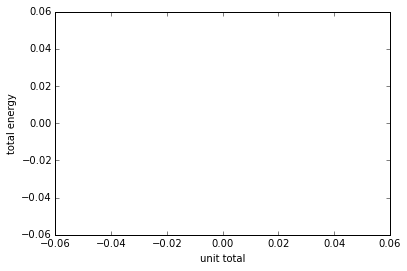

In [13]:
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']
#bblnrgdata = pd.merge(.....)
bblnrgdata = pd.merge(nrg, bsize, on = 'BBL')
print bblnrgdata.columns
bblnrgdata['building energy consumption'] = bblnrgdata['energy per sq'] * bblnrgdata['area']
pl.plot(kind='bar', x='UnitsTotal', y='building energy consumption', color='r', alpha=0.5, loglog=True)
pl.xlim([1, 1000])
pl.ylim([1000, 1e10])
pl.xlabel('unit total')
pl.ylabel('total energy')
pl.legend()

In [11]:
BBL_cut = bblnrgdata[(bblnrgdata['Building Energy Consumption']>=1000)&(bblnrgdata['Building Energy Consumption']<1e+10) & (bblnrgdata['UnitsTotal']>=1)&(bblnrgdata['UnitsTotal']<1000)]#model = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires where x or y is NaN
X = sm.add_constant(np.log10(BBL_cut['UnitsTotal']))
Y = np.log10(BBL_cut['Building Energy Consumption'])
myfit = sm.OLS(Y, X, missing='drop').fit() # ignores entires where x or y is NaN
print myfit.params
myfit.summary()

KeyError: 'Building Energy Consumption'